<a href="https://colab.research.google.com/github/lucazappaterra/PhysLab-II---CYGNO/blob/main/trc_format_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parsing dei file in uscita dall'oscilloscopio con LecroyParser

Installiamo lecroyparser, va fatto ogni volta su Colab

In [37]:
!pip install lecroyparser

Importiamo le librerie

In [38]:
import lecroyparser
import matplotlib.pyplot as plt
import os

Scarichiamo i dati dalla repo su GitHub, e unzippiamoli (vanno caricati compressi per fare questa cosa). \\
Imho molto più comodo rispetto che a caricare la roba su colab ogni volta.

In [39]:
!wget https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/pmt-xxx.zip
!unzip pmt-xxx.zip 

--2022-03-21 13:39:53--  https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/pmt-xxx.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lucazappaterra/PhysLab-II---CYGNO/main/pmt-xxx.zip [following]
--2022-03-21 13:39:54--  https://raw.githubusercontent.com/lucazappaterra/PhysLab-II---CYGNO/main/pmt-xxx.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2759 (2.7K) [application/zip]
Saving to: ‘pmt-xxx.zip.1’

pmt-xxx.zip.1       100%[===================>]   2.69K  --.-KB/s    in 0s      

2022-03-21 13:39:54 (25.5 MB/s) - ‘pmt-xxx.zip.1’ saved [2759/2759]

Archive:  pmt-xxx.zip
repl

Giusto per vedere le cartelle nella directory facciamo un bel !ls

In [40]:
!ls

__MACOSX  pmt-xxx  pmt-xxx.zip	pmt-xxx.zip.1  sample_data


Impostiamo il percorso (andrà cambiato di volta in volta) e creiamo una variabile ' files ' che ci servirà dopo per il loop

In [41]:
path='pmt-xxx/'
files = os.listdir(path)

E ora un bel loop sui file, stampando qualche info e plottando quello che c'è dentro. \\
**N.B.:** in questo caso c'è un file, .DS_Store , che non so se ci sarà in ogni caso, ma va skippato perché altrimenti LecroyParser non sa che farci e impazzisce.

0 C1--900V-15mV--00001.trc
Le Croy Scope Data
Path: None - from bytes data
Endianness: <
Instrument: LECROYWS4104HD
Instrument Number: 18165
Template Name: LECROY_2_3
Channel: Channel 1
WaveArrayCount: 502
Vertical Coupling: DC50
Bandwidth Limit: off
Record Type: single_sweep
Processing: No Processing
TimeBase: 20 ns/div
TriggerTime: 2022-03-18 00:09:44.95

1 C1--900V-15mV--00000.trc
Le Croy Scope Data
Path: None - from bytes data
Endianness: <
Instrument: LECROYWS4104HD
Instrument Number: 18165
Template Name: LECROY_2_3
Channel: Channel 1
WaveArrayCount: 502
Vertical Coupling: DC50
Bandwidth Limit: off
Record Type: single_sweep
Processing: No Processing
TimeBase: 20 ns/div
TriggerTime: 2022-03-18 00:09:22.36



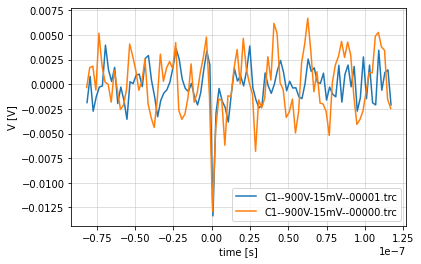

In [42]:
usample=100
for i,filename in enumerate(files):
    print(i,filename)
    #if(i==2): pass # .Ds_Store 
    #else:
    f = open(path+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                   # we can't go further than the "WaveArrayCount"
    print(data)
    plt.plot(data.x, data.y, label=filename)
    plt.grid(alpha=.5)
    plt.xlabel('time [s]')
    plt.ylabel('V [V]')
    plt.legend()
    f.close()

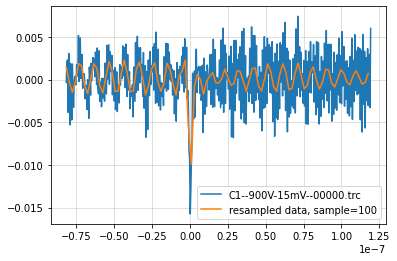

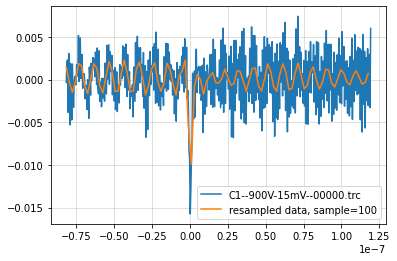

In [43]:
from scipy import signal
data = lecroyparser.ScopeData(path+filename)
for i in enumerate(files):
    plt.plot(data.x, data.y, label=filename)
    data_rs = signal.resample(data.y, usample, data.x)
    plt.plot(data_rs[1], data_rs[0], label=f'resampled data, sample={usample}')
    plt.legend()
    plt.grid(alpha=.5)
    plt.show()

In [44]:
print(data.verticalGain, data.timeBase, data.horizOffset, data.verticalOffset)

1.47055e-06 20 ns/div -8.155639999999993e-08 0.018


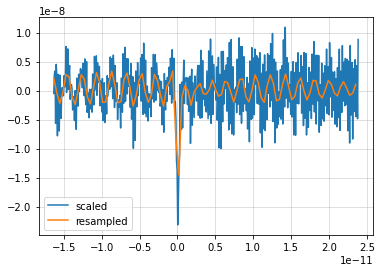

In [56]:
a = data.y *  data.verticalGain
t = data.x *  float(data.timeBase.split(' ')[0]) * 10e-6 # da mettere a posto con varie scale
plt.plot(t, a, label='scaled')
data_rs = signal.resample(a, usample, t)
plt.plot(data_rs[1], data_rs[0], label='resampled')
plt.legend()
plt.grid(alpha=.5)
plt.show()